In [1]:
%load_ext autoreload
%autoreload 2
%cd '~/deepshape/deepshape'

/home/jorgen/deepshape/deepshape


In [2]:
import torch 
import torch.nn as nn
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors

import time

In [5]:
from deepshape.surfaces import *
from deepshape.curves import *
# from layers import FourierLayer2D
# from palais_layer import *
# from surfaces import *
# from visual import get_plot_data, plot_diffeomorphism
# from networks import ReparametrizationNetwork2D
# from curves import LogStepDiff

In [6]:
savepath = "/home/jorgen/masters-thesis-shape-analysis/chapter05/figures/deep/rotation/"

In [7]:
# TODO: Create example surfaces library, and load from there.
C = (
    lambda x: x[..., 0],
    lambda x: x[..., 1],
    lambda x: x[..., 0]**2 - x[..., 1]**2
)



f = Surface(C)

def angle(x):
    return 0.5 * np.pi * torch.sin(np.pi * x[..., 0]) * torch.sin(np.pi * x[..., 1])

γ = Diffeomorphism(
    (
        lambda x: (x[..., 0] - 0.5) * torch.cos(angle(x)) - (x[..., 1] - 0.5) * torch.sin(angle(x)) + 0.5,
        lambda x: (x[..., 0] - 0.5) * torch.sin(angle(x)) + (x[..., 1] - 0.5) * torch.cos(angle(x)) + 0.5
))

g = f.compose(γ)
q = Qmap(g)
r = Qmap(f)

In [10]:
file = "../data/t10k-images.idx3-ubyte"
data = torch.tensor( idx2numpy.convert_from_file(file) )

NameError: name 'idx2numpy' is not defined

In [8]:
# Get color normalizer
k = 32
fcolors = get_plot_data(f.volume_factor, k=k).squeeze()
gcolors = get_plot_data(g.volume_factor, k=k).squeeze()
norm = colors.Normalize(vmin=min(fcolors.min(), gcolors.min()), vmax=max(fcolors.max(), gcolors.max()))

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(*Z, shade=False, facecolors=cm.jet(norm(gcolors)), rstride=1, cstride=1)
ax.view_init(35, 225)
plt.show()

TypeError: get_plot_data() got an unexpected keyword argument 'k'

NameError: name 'Z' is not defined

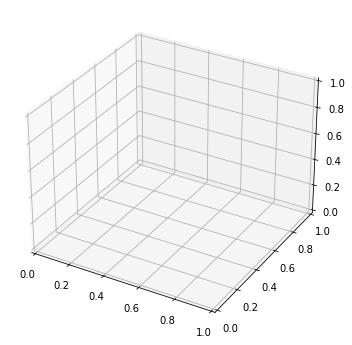

In [9]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(*Z, shade=False, facecolors=cm.jet(norm(gcolors)), rstride=1, cstride=1)
ax.view_init(35, 225)
plt.show()

Z = get_plot_data(f, k=k)
fcolors = get_plot_data(f.volume_factor, k=k).squeeze()

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(*Z, shade=False, facecolors=cm.jet(norm(fcolors)), rstride=1, cstride=1)
ax.view_init(35, 225)
plt.show()

fafter = f.compose(lambda x: RN(x)[0])
Z = get_plot_data(fafter, k=k)
fafcolors = get_plot_data(fafter.volume_factor, k=k).squeeze()

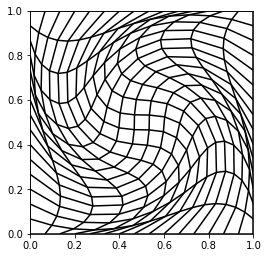

In [10]:
plot_diffeomorphism(γ, k=16, color="black")
plt.gcf().set_size_inches(4, 4.1)
plt.axis("equal")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

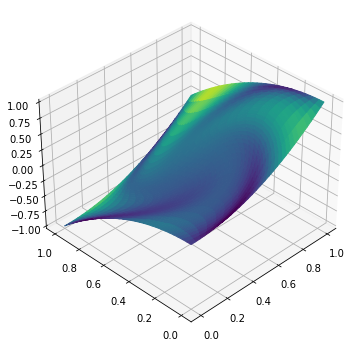

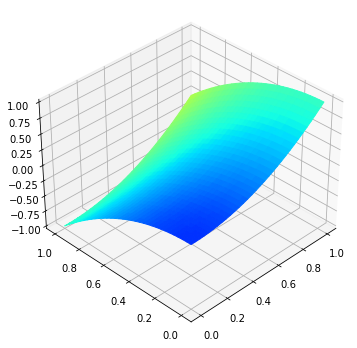

NameError: name 'RN' is not defined

In [13]:
k = 32
Z = get_plot_data(g, k=k)
gcolors = get_plot_data(g.volume_factor, k=k).squeeze()

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(*Z, shade=False, facecolors=cm.viridis(norm(gcolors)), rstride=1, cstride=1)
ax.view_init(35, 225)
plt.show()

Z = get_plot_data(f, k=k)
fcolors = get_plot_data(f.volume_factor, k=k).squeeze()

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(*Z, shade=False, facecolors=cm.jet(norm(fcolors)), rstride=1, cstride=1)
ax.view_init(35, 225)
plt.show()

fafter = f.compose(lambda x: RN(x)[0])
Z = get_plot_data(fafter, k=k)
fafcolors = get_plot_data(fafter.volume_factor, k=k).squeeze()

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(*Z, shade=False, facecolors=cm.jet(norm(fafcolors)), rstride=1, cstride=1)
ax.view_init(35, 225)
plt.show()